In [39]:
# Import pandas
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [40]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [41]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/micro_world.csv')
philippine_data = data[
    data['economy'] == 'Philippines'
]

In [81]:
philippine_data['no_accounts'] = philippine_data.apply(
    lambda x: 1 if x['fin11a'] == 1 or x['fin11b'] == 1 or x['fin11c'] == 1 or x['fin11d'] == 1 or x['fin11e'] == 1 or x['fin11f'] == 1 or x['fin11g'] == 1 or x['fin11h'] == 1
    or x['fin11a'] == 2 or x['fin11b'] == 2 or x['fin11c'] == 2 or x['fin11d'] == 2 or x['fin11e'] == 2 or x['fin11f'] == 2 or x['fin11g'] == 2 or x['fin11h'] == 2
    or x['fin11a'] == 3 or x['fin11b'] == 3 or x['fin11c'] == 3 or x['fin11d'] == 3 or x['fin11e'] == 3 or x['fin11f'] == 3 or x['fin11g'] == 3 or x['fin11h'] == 3
    or x['fin11a'] == 4 or x['fin11b'] == 4 or x['fin11c'] == 4 or x['fin11d'] == 4 or x['fin11e'] == 4 or x['fin11f'] == 4 or x['fin11g'] == 4 or x['fin11h'] == 4
     else "0", axis=1
    )

In [82]:
ph_data_NA = philippine_data[philippine_data['fin11f']==2]

In [ ]:
ph_data_NA['cant_afford'] = ph_data_NA['fin11f'].apply(
    lambda x: 1 if x == 2 else 0
    )

In [84]:

# Group the data and apply aggregations
grouped_data = ph_data_NA.groupby(['inc_q']).agg(
    total_cant_afford=('cant_afford', 'sum')
).reset_index()

# Compute debit card ownership in %
grouped_data['% of p'] = grouped_data['total_cant_afford']*100.0/grouped_data['total_cant_afford'].sum()

In [85]:
income_group_mapping = {
    1:'poorest 20%',
    2:'second 20%',
    3:'middle 20%',
    4:'fourth 20%',
    5:'richest 20%'
}

In [86]:
grouped_data = grouped_data.replace({'inc_q':income_group_mapping})

In [87]:
grouped_data = grouped_data.sort_values('% of p', ascending=False).head(10).reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


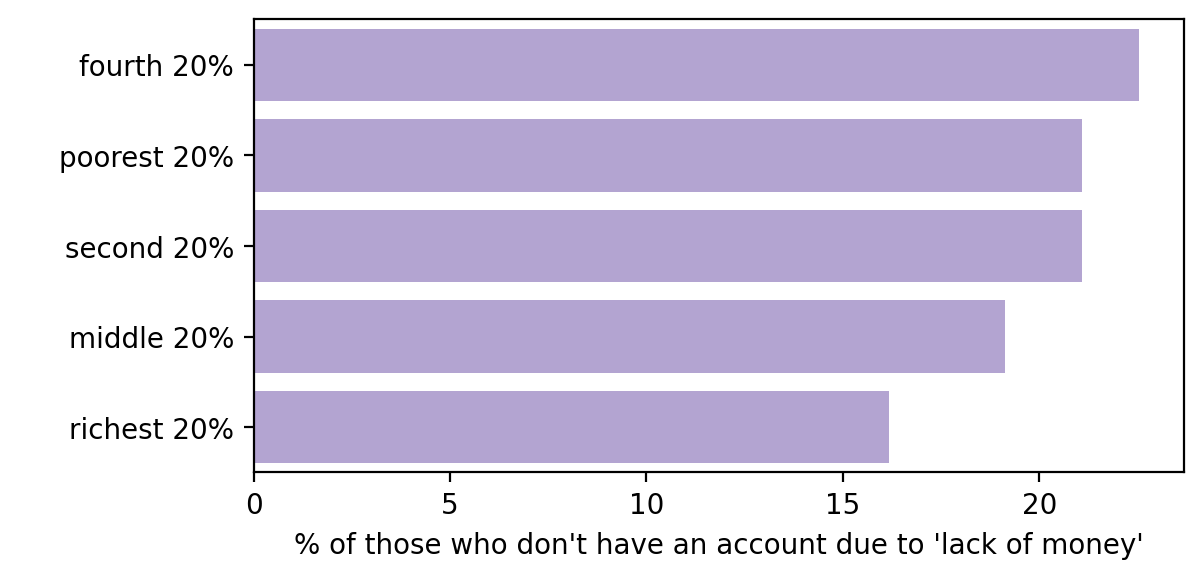

In [88]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Run bar plot
sns.barplot(
    
    grouped_data['% of p'],
    grouped_data['inc_q'],
    
    color='#b19cd9'
)

# Set title
plt.title('')

# Set labels
plt.xlabel("% of those who don't have an account due to 'lack of money'")
plt.ylabel(' ')

# Show figure
plt.show()

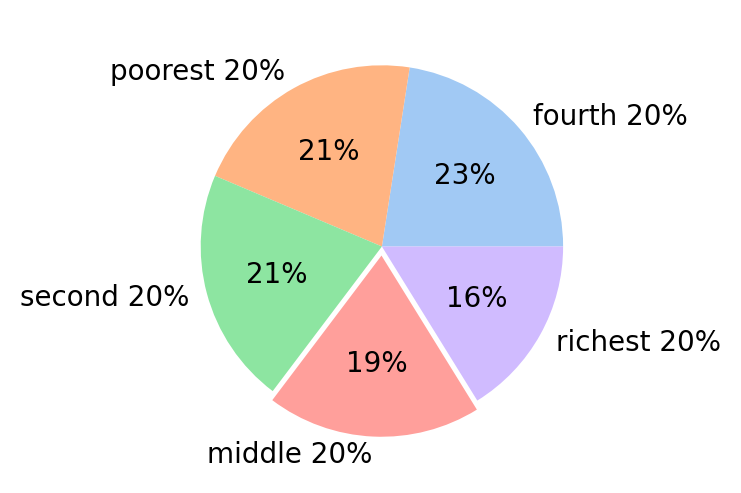

In [79]:
plt.figure(figsize=(6,3)  , dpi=200)
explode = [0, 0, 0, 0.05, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
plt.pie(grouped_data['total_cant_afford'], labels=grouped_data['inc_q'],colors = palette_color,
        explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.show()

In [80]:
ph_data_NA['cant_afford'].sum()/ph_data_NA['fin11f'].sum()

0.5